In [3]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**PREPROCESSING**

In [4]:
path = "arguments-training.tsv"
df = pd.read_table(path, sep = "\t")
df.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [5]:
# renaming the Argument ID column so that there is no space
df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [6]:
l_path = "labels-training.tsv"
temp_labels_df = pd.read_table(l_path, sep="\t")
temp_labels_df.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [7]:
# renaming the Argument ID column so that there is no space
temp_labels_df.rename(columns={"Argument ID": "Argument_ID"}, inplace=True)

In [8]:
pd.set_option('display.max_columns', None)
temp_labels_df.head()

,Argument_ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [9]:
labels_dicts = temp_labels_df.to_dict(orient = "records")
labels_dicts

[{'Argument_ID': 'A01002',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 0,
  'Security: societal': 1,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,
  'Universalism: nature': 0,
  'Universalism: tolerance': 0,
  'Universalism: objectivity': 0},
 {'Argument_ID': 'A01005',
  'Self-direction: thought': 0,
  'Self-direction: action': 0,
  'Stimulation': 0,
  'Hedonism': 0,
  'Achievement': 0,
  'Power: dominance': 0,
  'Power: resources': 0,
  'Face': 0,
  'Security: personal': 1,
  'Security: societal': 0,
  'Tradition': 0,
  'Conformity: rules': 0,
  'Conformity: interpersonal': 0,
  'Humility': 0,
  'Benevolence: caring': 0,
  'Benevolence: dependability': 0,
  'Universalism: concern': 0,


In [10]:
# create a list of the labels for each argument
labels_list = [[labels for labels in dic if dic[labels] == 1] for dic in labels_dicts]
# labels_list

In [11]:
# label the data using a common identifier
training_data=pd.merge(df, temp_labels_df, on="Argument_ID")

In [12]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5389,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1
5390,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5391,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1


In [13]:
# create a new column that contains the labels of each argument
training_data["labels"]=labels_list

In [14]:
# drop the row with no labels

training_data.drop(index=3358, inplace=True)

In [15]:
# reset the row indices
training_data=training_data.reset_index(drop=True)

# print(training_data)

**DATA UNDERSTANDING**

In [16]:
def tokenize(text):
    tokenized = nltk.word_tokenize(text.lower())
    return tokenized

In [17]:
training_data["tokenized_premise"] = training_data["Premise"].apply(tokenize)
training_data

,Argument_ID,Conclusion,Stance,Premise,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity,labels,tokenized_premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,[Security: societal],"[we, should, ban, human, cloning, as, it, will..."
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,[Security: personal],"[fast, food, should, be, banned, because, it, ..."
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"[Power: dominance, Security: societal]","[sometimes, economic, sanctions, are, the, onl..."
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,"[Security: societal, Conformity: rules, Univer...","[capital, punishment, is, sometimes, the, only..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,"[Security: personal, Benevolence: caring, Univ...","[factory, farming, allows, for, the, productio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,"[Achievement, Power: dominance, Security: soci...","[on, the, one, hand, ,, we, have, russia, kill..."
5388,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Conformity: rules, Benevo...","[the, subsidies, were, originally, intended, t..."
5389,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,"[Benevolence: dependability, Universalism: nat...","[these, products, come, mainly, from, large, e..."
5390,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,"[Security: personal, Security: societal, Confo...","[subsidies, often, make, farmers, in, recipien..."


In [18]:
labels_col = ["Self-direction: thought", "Self-direction: action", "Stimulation", "Hedonism", "Achievement", "Power: dominance", "Power: resources", "Face", "Security: personal", "Security: societal", "Tradition", "Conformity: rules", "Conformity: interpersonal", "Humility", "Benevolence: caring", "Benevolence: dependability", "Universalism: concern", "Universalism: nature", "Universalism: tolerance", "Universalism: objectivity"]

In [19]:
def get_freq_dist(text):
    freqs = nltk.FreqDist(text)
    return freqs

In [20]:
label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.tokenized_premise)
    label2freq[label] = get_freq_dist(text)


# label2freq


In [21]:
label2freq["Benevolence: caring"].most_common(20)

[('.', 1331),
 ('the', 1232),
 ('to', 1198),
 ('and', 933),
 (',', 649),
 ('of', 647),
 ('a', 630),
 ('is', 572),
 ('be', 466),
 ('for', 445),
 ('in', 443),
 ('should', 402),
 ('it', 390),
 ('are', 369),
 ('we', 367),
 ('people', 364),
 ('that', 321),
 ('not', 305),
 ('they', 246),
 ('their', 234)]

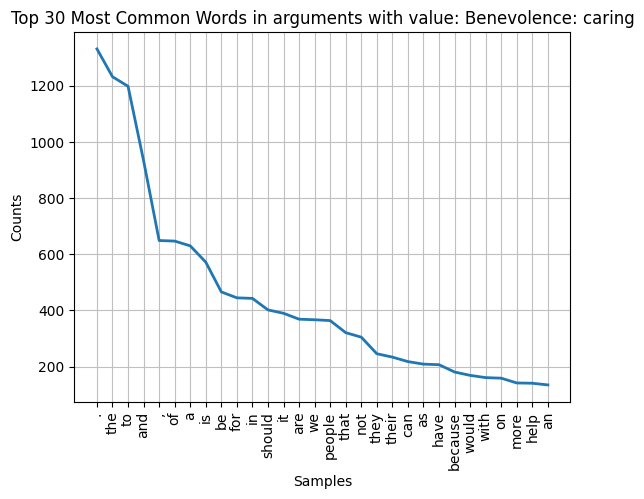

<Axes: title={'center': 'Top 30 Most Common Words in arguments with value: Benevolence: caring'}, xlabel='Samples', ylabel='Counts'>

In [22]:
label2freq["Benevolence: caring"].plot(30, title='Top 30 Most Common Words in arguments with value: Benevolence: caring')

**DATA CLEANING** 

*Now we look at the Freq Dist without stopwords or punctuation*

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
def filter_tokens(tokens):
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    return filtered_tokens

In [26]:
training_data["no_stopwords_premise"]=training_data["tokenized_premise"].apply(filter_tokens)
# training_data

In [27]:
no_sw_label2freq = {}
for label in labels_col:
    text = []
    for i, row in training_data.iterrows():
        if label in row.labels:
            text.extend(row.no_stopwords_premise)
    no_sw_label2freq[label] = get_freq_dist(text)

# no_sw_label2freq

In [28]:
no_sw_label2freq["Tradition"].most_common(30)

[('people', 126),
 ('religion', 88),
 ('right', 87),
 ('school', 60),
 ('prayer', 54),
 ('many', 48),
 ("n't", 47),
 ('would', 47),
 ('want', 44),
 ('freedom', 42),
 ('language', 41),
 ('church', 38),
 ("'s", 35),
 ('must', 35),
 ('countries', 34),
 ('ban', 34),
 ('country', 33),
 ('human', 32),
 ('need', 32),
 ('sex', 32),
 ('atheism', 31),
 ('work', 31),
 ('scientology', 31),
 ('eu', 30),
 ('adopt', 29),
 ('one', 29),
 ('way', 28),
 ('believe', 28),
 ('values', 27),
 ('europe', 27)]

In [49]:
for label in labels_col:
    words = [w for (w, f) in no_sw_label2freq[label].most_common(20)]
    print(f"The 10 most frequent words for the label {label} are: \t {words}\n")

The 10 most frequent words for the label Self-direction: thought are: 	 ['people', 'right', 'religion', 'would', 'school', 'freedom', 'rights', 'want', "n't", 'research', 'church', 'many', 'children', 'property', 'could', 'intellectual', 'prayer', 'human', 'need', 'wikipedia']

The 10 most frequent words for the label Self-direction: action are: 	 ['people', 'right', 'would', 'want', "n't", 'freedom', "'s", 'need', 'school', 'eu', 'religion', 'way', 'able', 'many', 'government', 'free', 'ban', 'surgery', 'allowed', 'choose']

The 10 most frequent words for the label Stimulation are: 	 ['people', 'would', 'world', 'children', 'human', 'need', 'child', 'want', 'make', 'allow', 'many', 'games', 'ban', 'way', 'help', 'countries', 'space', 'actors', 'olympic', 'use']

The 10 most frequent words for the label Hedonism are: 	 ['people', 'many', 'cannabis', 'surgery', 'food', 'would', 'children', 'cosmetic', 'child', 'fast', 'ban', 'time', "n't", 'actors', 'right', 'want', 'allow', "'s", 'help

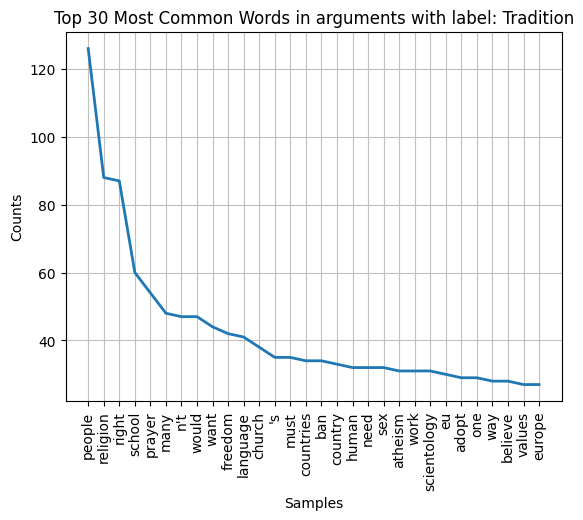

<Axes: title={'center': 'Top 30 Most Common Words in arguments with label: Tradition'}, xlabel='Samples', ylabel='Counts'>

In [29]:
label = "Tradition"
no_sw_label2freq[label].plot(30, title=f'Top 30 Most Common Words in arguments with label: {label}')

**TEXT ANNOTATION**

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
def get_pos_tag(text):
    pos_list = []
    for token, pos in nltk.pos_tag(text):
        pos_list.append(pos)
    return pos_list

In [32]:
training_data["POS"]=training_data["tokenized_premise"].apply(get_pos_tag)

In [33]:
training_data["POS"]

0       [PRP, MD, VB, JJ, NN, IN, PRP, MD, RB, VB, JJ,...
1       [RB, NN, MD, VB, VBN, IN, PRP, VBZ, RB, JJ, IN...
2       [RB, JJ, NNS, VBP, DT, JJ, NN, WDT, MD, VB, DT...
3       [NN, NN, VBZ, RB, DT, JJ, NN, TO, VB, NNS, IN,...
4       [NN, NN, VBZ, IN, DT, NN, IN, JJ, NN, ,, WDT, ...
                              ...                        
5387    [IN, DT, CD, NN, ,, PRP, VBP, VBN, VBG, NN, NN...
5388    [DT, NNS, VBD, RB, VBN, TO, VB, DT, NN, IN, NN...
5389    [DT, NNS, VBP, RB, IN, JJ, NNS, ,, WDT, VBP, R...
5390    [NNS, RB, VBP, NNS, IN, JJ, NNS, JJ, ,, VBG, J...
5391    [DT, NN, MD, RB, RB, JJ, IN, NN, CC, NN, ., NN...
Name: POS, Length: 5392, dtype: object

In [34]:
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cate9\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [35]:
def get_lemma(text):
    lemmas = []
    for token in text:
        lemmas.append(lemmatizer.lemmatize(token))
    return lemmas

In [36]:
training_data["LEMMA"] = training_data["tokenized_premise"].apply(get_lemma)

In [37]:
training_data["LEMMA"]

0       [we, should, ban, human, cloning, a, it, will,...
1       [fast, food, should, be, banned, because, it, ...
2       [sometimes, economic, sanction, are, the, only...
3       [capital, punishment, is, sometimes, the, only...
4       [factory, farming, allows, for, the, productio...
                              ...                        
5387    [on, the, one, hand, ,, we, have, russia, kill...
5388    [the, subsidy, were, originally, intended, to,...
5389    [these, product, come, mainly, from, large, en...
5390    [subsidy, often, make, farmer, in, recipient, ...
5391    [the, eu, can, not, endlessly, lean, on, ameri...
Name: LEMMA, Length: 5392, dtype: object

In [38]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()


In [46]:

def get_n_collocations(n, label, grams):
    try:
        if grams != (2 or 3):
         raise ValueError("the parameter 'grams' must have a value of 2 or 3")

    except TypeError as e: 
        print(e)

    else:
        text = []

        for i, row in training_data.iterrows():
            if label in row.labels:
                text.extend(row.no_stopwords_premise)

        print(f"The {n} {grams}grams with highest PMI for the label {label} are: \t")
        
        if grams == 2:
            b = BigramCollocationFinder.from_words(text)
            b.apply_freq_filter(10)
            best = b.nbest(bigram_measures.pmi, 10)
            print(best)

        if grams == 3:
            t = TrigramCollocationFinder.from_words(text)
            t.apply_freq_filter(10)
            best = t.nbest(trigram_measures.pmi, 10)
            print(best)
            

In [40]:
get_n_collocations(10, "Power: dominance", 2)

The 10 2grams with highest PMI for the label Power: dominance are 	
[('austerity', 'regime'), ('judicial', 'activism'), ('capital', 'punishment'), ('member', 'states'), ('private', 'military'), ('economic', 'sanctions'), ('compulsory', 'voting'), ('nuclear', 'weapons'), ('military', 'companies'), ('multi-party', 'system')]




In [47]:
for label in labels_col:
    get_n_collocations(10, label=label, grams = 2)
    print("\n")

The 10 2grams with highest PMI for the label Self-direction: thought are: 	
[('cosmetic', 'surgery'), ('pride', 'parades'), ('compulsory', 'voting'), ('child', 'actors'), ('stem', 'cell'), ('embryonic', 'stem'), ('safe', 'spaces'), ('space', 'exploration'), ('multi-party', 'system'), ('missionary', 'work')]


The 10 2grams with highest PMI for the label Self-direction: action are: 	
[('algorithmic', 'trading'), ('autonomous', 'cars'), ('student', 'loans'), ('bear', 'arms'), ('intellectual', 'property'), ('pride', 'parades'), ('member', 'states'), ('compulsory', 'voting'), ('mandatory', 'retirement'), ('human', 'cloning')]


The 10 2grams with highest PMI for the label Stimulation are: 	
[('cosmetic', 'surgery'), ('space', 'exploration'), ('olympic', 'games'), ('child', 'actors')]


The 10 2grams with highest PMI for the label Hedonism are: 	
[('child', 'actors'), ('cosmetic', 'surgery'), ('fast', 'food'), ('many', 'people')]


The 10 2grams with highest PMI for the label Achievement ar